In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount Google Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Meta-Data Analysis

In [16]:
meta_train_df = pd.read_csv('/content/drive/MyDrive/ISIC-2017_Training_Data_metadata.csv')
meta_test_df=pd.read_csv('/content/drive/MyDrive/ISIC-2017_Test_v2_Data_metadata.csv')
meta_val_df=pd.read_csv('/content/drive/MyDrive/ISIC-2017_Validation_Data_metadata.csv')

In [17]:
meta_train_df.head()

,image_id,age_approximate,sex
0,ISIC_0000000,55,female
1,ISIC_0000001,30,female
2,ISIC_0000002,60,female
3,ISIC_0000003,30,male
4,ISIC_0000004,80,male


In [18]:
copy_of_meta_train_df = meta_train_df.copy()

In [19]:
copy_of_meta_train_df.replace(['0', 'unknown'], np.nan, inplace=True)
missing_values = copy_of_meta_train_df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)

image_id             0
age_approximate    256
sex                229
dtype: int64


**Gender Distribution**

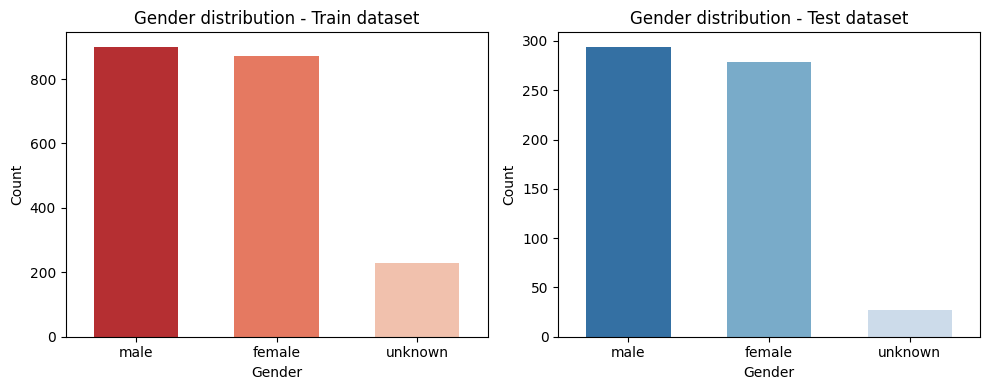

In [25]:
train_counts = meta_train_df.sex.value_counts()
test_counts = meta_test_df.sex.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=train_counts.index, y=train_counts.values, palette="Reds_r", ax=axes[0], width=0.6)
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].set_title("Gender distribution - Train dataset")

sns.barplot(x=test_counts.index, y=test_counts.values, palette="Blues_r", ax=axes[1], width=0.6)
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
axes[1].set_title("Gender distribution - Test dataset")

plt.tight_layout()
plt.show()


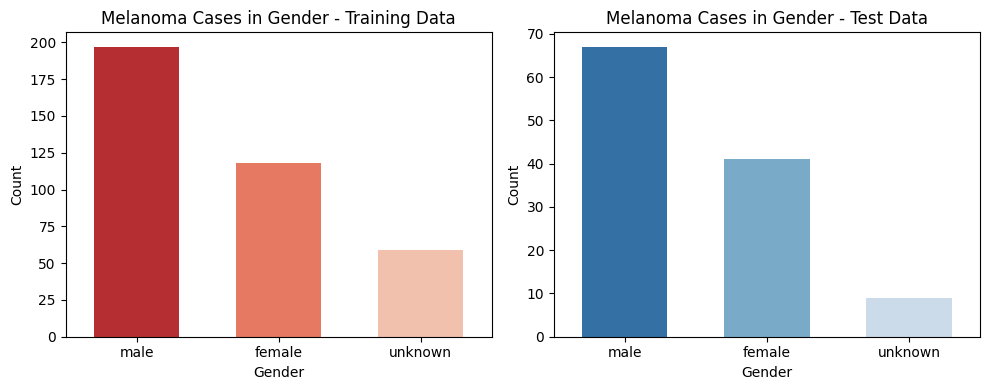

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load metadata and ground truth data for training and test data
train_metadata_path = "/content/drive/MyDrive/ISIC-2017_Training_Data_metadata.csv"
train_ground_truth_path = "/content/drive/MyDrive/ISIC-2017_Training_Part3_GroundTruth.csv"
test_metadata_path = "/content/drive/MyDrive/ISIC-2017_Test_v2_Data_metadata.csv"
test_ground_truth_path = "/content/drive/MyDrive/ISIC-2017_Test_v2_Part3_GroundTruth.csv"

train_metadata_df = pd.read_csv(train_metadata_path)
train_ground_truth_df = pd.read_csv(train_ground_truth_path)
test_metadata_df = pd.read_csv(test_metadata_path)
test_ground_truth_df = pd.read_csv(test_ground_truth_path)

# Merge metadata and ground truth based on image_id for both training and test data
train_merged_df = pd.merge(train_metadata_df, train_ground_truth_df, on="image_id")
test_merged_df = pd.merge(test_metadata_df, test_ground_truth_df, on="image_id")

# Filter melanoma cases for training and test data
train_melanoma_df = train_merged_df[train_merged_df["melanoma"] == 1]
test_melanoma_df = test_merged_df[test_merged_df["melanoma"] == 1]

# Count melanoma cases in each gender for training and test data
train_gender_counts = train_melanoma_df["sex"].value_counts()
test_gender_counts = test_melanoma_df["sex"].value_counts()

# Plot the gender distribution of melanoma cases for training and test data side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=train_gender_counts.index, y=train_gender_counts.values, palette="Reds_r", ax=axes[0],width=0.6)
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].set_title("Melanoma Cases in Gender - Training Data")

sns.barplot(x=test_gender_counts.index, y=test_gender_counts.values, palette="Blues_r", ax=axes[1], width=0.6)
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
axes[1].set_title("Melanoma Cases in Gender - Test Data")

plt.tight_layout()
plt.show()


**Age Distribution**

<ipython-input-27-cce19019a64c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_age.age_approximate = pd.to_numeric( train_df_age.age_approximate )
<ipython-input-27-cce19019a64c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_age.age_approximate =  pd.to_numeric( test_df_age.age_approximate )


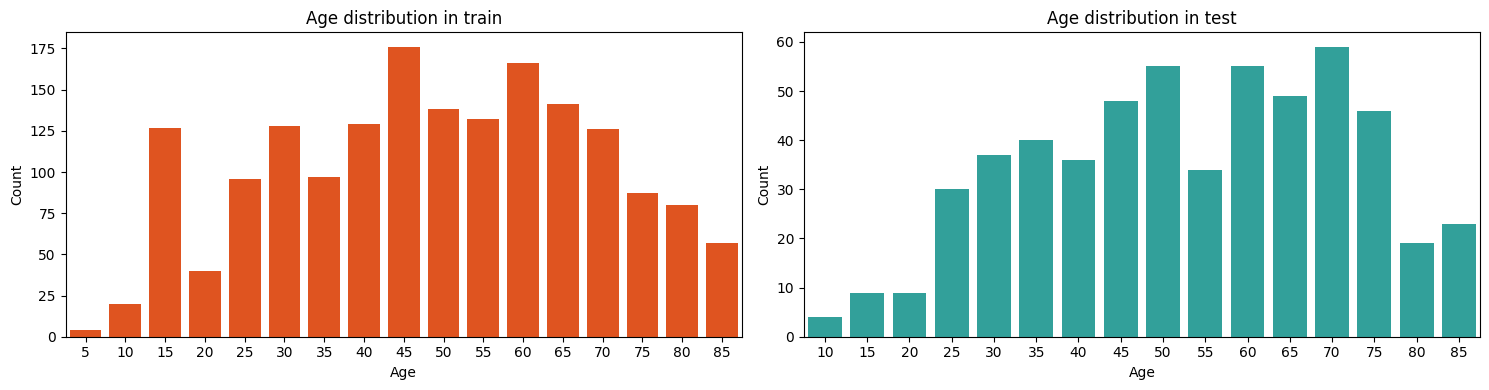

In [27]:
train_df_age = meta_train_df[meta_train_df.age_approximate != 'unknown']
test_df_age = meta_test_df[meta_test_df.age_approximate != 'unknown']

# Converting the age in train data to nuemeric to get the graph in incresing order
train_df_age.age_approximate = pd.to_numeric( train_df_age.age_approximate )

# Converting the age in test data to nuemeric to get the graph in incresing order
test_df_age.age_approximate =  pd.to_numeric( test_df_age.age_approximate )

fig, axes =  plt.subplots(1 , 2, figsize=(15, 4))

sns.countplot(data = train_df_age, x = 'age_approximate', color = "orangered", ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Age distribution in train")

sns.countplot(data=test_df_age, x='age_approximate', color="lightseagreen", ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")
axes[1].set_title("Age distribution in test")

plt.tight_layout()
plt.show()


Age distribution in melanoma cases

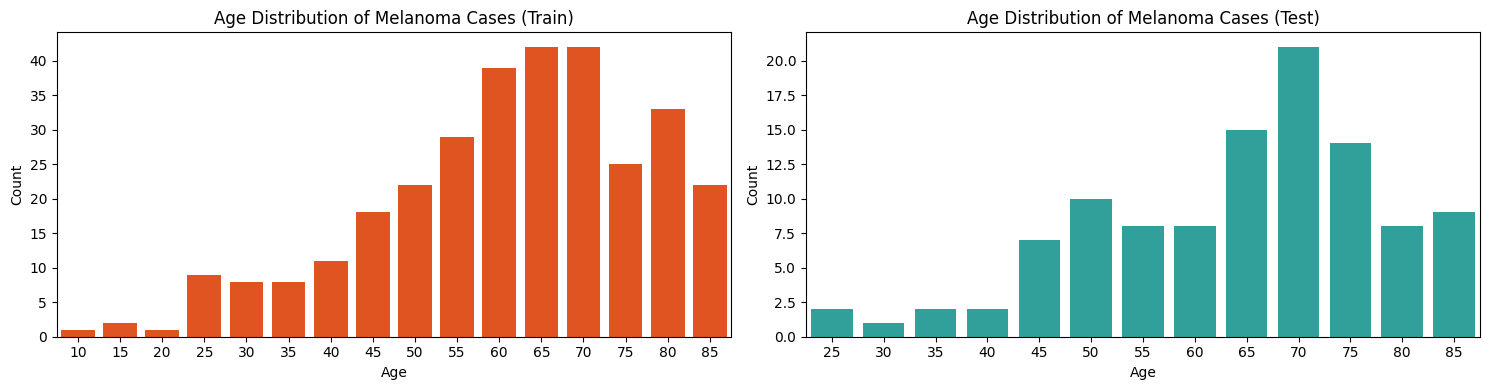

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metadata_train_path = "/content/drive/MyDrive/ISIC-2017_Training_Data_metadata.csv"
ground_truth_train_path = "/content/drive/MyDrive/ISIC-2017_Training_Part3_GroundTruth.csv"
metadata_test_path = "/content/drive/MyDrive/ISIC-2017_Test_v2_Data_metadata.csv"
ground_truth_test_path = "/content/drive/MyDrive/ISIC-2017_Test_v2_Part3_GroundTruth.csv"

# Read train and test metadata and ground truth data
metadata_train_df = pd.read_csv(metadata_train_path)
ground_truth_train_df = pd.read_csv(ground_truth_train_path)
metadata_test_df = pd.read_csv(metadata_test_path)
ground_truth_test_df = pd.read_csv(ground_truth_test_path)

# Merge train metadata and ground truth based on image_id
merged_train_df = pd.merge(metadata_train_df, ground_truth_train_df, on="image_id")

# Merge test metadata and ground truth based on image_id
merged_test_df = pd.merge(metadata_test_df, ground_truth_test_df, on="image_id")

# Filter melanoma cases for train and test data
melanoma_train_df = merged_train_df[merged_train_df["melanoma"] == 1]
melanoma_test_df = merged_test_df[merged_test_df["melanoma"] == 1]

# Remove "unknown" values from age_approximate column for train data
melanoma_train_df = melanoma_train_df[melanoma_train_df["age_approximate"] != "unknown"]
melanoma_train_df["age_approximate"] = pd.to_numeric(melanoma_train_df["age_approximate"])

# Remove "unknown" values from age_approximate column for test data
melanoma_test_df = melanoma_test_df[melanoma_test_df["age_approximate"] != "unknown"]
melanoma_test_df["age_approximate"] = pd.to_numeric(melanoma_test_df["age_approximate"])

# Create subplots for train and test data
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot count distribution of melanoma cases by age for train data
sns.countplot(data=melanoma_train_df, x='age_approximate', color='orangered', ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Age Distribution of Melanoma Cases (Train)")

# Plot count distribution of melanoma cases by age for test data
sns.countplot(data=melanoma_test_df, x='age_approximate', color='lightseagreen', ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")
axes[1].set_title("Age Distribution of Melanoma Cases (Test)")

plt.tight_layout()
plt.show()


Data distribution in each class of the task 1

In [31]:
import os

In [32]:
# Set the directories for the data for task1 (MEL VS NEVUS AND SEB)
train_dir = "/content/drive/MyDrive/msc_project/train_merged/task1"
test_dir = "/content/drive/MyDrive/msc_project/test/task1"

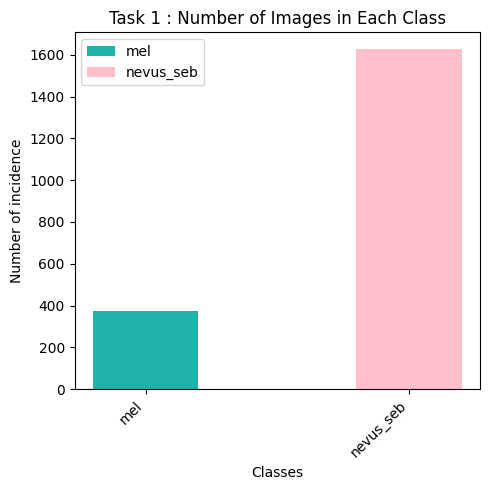

In [34]:

task_directory = '/content/drive/MyDrive/msc_project/train/task1'

classes = os.listdir(task_directory)

counts = {}

for image in classes:
    task_dir = os.path.join(task_directory, image)
    num_images = len(os.listdir(task_dir))
    counts[image] = num_images

class_names = list(counts.keys())
incident_counts = list(counts.values())

colors = ['lightseagreen', 'pink']

plt.figure(figsize=(5, 5))
bars = plt.bar(class_names, incident_counts, color=colors, width=0.4)
plt.xlabel('Classes')
plt.ylabel('Number of incidence')
plt.title('Task 1 : Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')

plt.legend(bars, class_names)

plt.tight_layout()
plt.show()


Data distribution in each class of the task 2

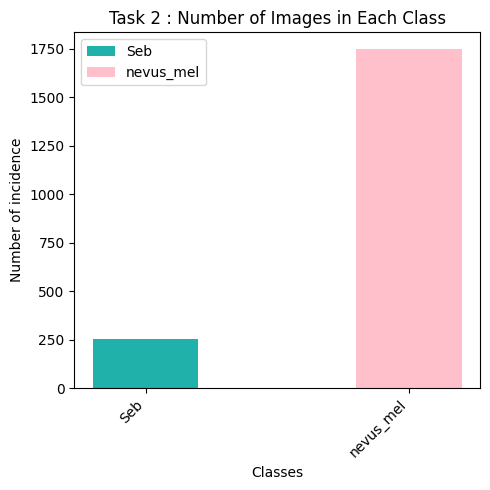

In [35]:

task_directory = '/content/drive/MyDrive/msc_project/train/task2'

classes = os.listdir(task_directory)

counts = {}

for image in classes:
    task_dir = os.path.join(task_directory, image)
    num_images = len(os.listdir(task_dir))
    counts[image] = num_images

class_names = list(counts.keys())
incident_counts = list(counts.values())

colors = ['lightseagreen', 'pink']

plt.figure(figsize=(5, 5))
bars = plt.bar(class_names, incident_counts, color=colors, width=0.4)
plt.xlabel('Classes')
plt.ylabel('Number of incidence')
plt.title('Task 2 : Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')

plt.legend(bars, class_names)

plt.tight_layout()
plt.show()


Hair Removal Algorithm

In [36]:
def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))

    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)

    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)

    return final_image

In [37]:
import matplotlib.image as mpimg
import cv2

In [38]:
path = "/content/drive/MyDrive/msc_project/train/task1/mel/ISIC_0000043.jpg"
before_image = mpimg.imread(path)
image = cv2.resize(before_image,(300, 300))
image = hair_remove(image)

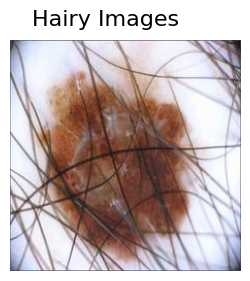

In [39]:
# Show the sample
plt.figure(figsize=(16,3))
plt.suptitle("Hairy Images", fontsize = 16)
# Display the image
plt.imshow(before_image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

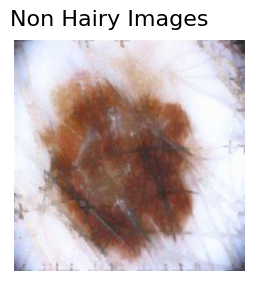

In [40]:
# Show the sample
plt.figure(figsize=(16,3))
plt.suptitle("Non Hairy Images", fontsize = 16)
# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()